# Développer une segmentation client pour définir la stratégie marketing

CUST_ID :  identification du titulaire de la carte de crédit (catégoriel)

BALANCE :  montant du solde restant sur leur compte pour effectuer des achats (BALANCE_FREQUENCY : fréquence de mise à jour du solde, score compris entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)) 

ACHATS :  Montant des achats effectués depuis le compte

ONEOFF_PURCHASES :  montant maximum d'achat effectué en une seule fois

 INSTALLMENTS_PURCHASES :  montant de l'achat effectué en plusieurs fois

 CASH_ADVANCE :  Paiement d'avance donné par l'utilisateur

PURCHASES_FREQUENCY :  fréquence des achats, score compris entre 0 et 1 (1 = achats fréquents, 0 = achats peu fréquents)

 ONEOFFPURCHASESFREQUENCY :  fréquence des achats simultanés (1 = achats fréquents, 0 = achats peu fréquents)

 PURCHASESINSTALLMENTSFREQUENCY :  la fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents)

CASHADVANCEFREQUENCY : fréquence de versement de l'avance en espèces 

CASHADVANCETRX : Nombre de transactions effectuées avec "Cash in Advance"  PURCHASES_TRX : Nombre de transactions d'achat effectuées

 CREDIT_LIMIT : Limite de carte de crédit pour l'utilisateur 

PAYMENTS : montant du paiement effectué par l'utilisateurMINIMUM_PAYMENTS : montant minimum des paiements effectués par l'utilisateur PRCFULLPAYMENT : pourcentage du paiement total payé par l'utilisateurTENURE : durée du service de carte de crédit pour l'utilisateur


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df=df.drop("CUST_ID",axis=1)

In [5]:
df=df.dropna()

### StandardScaler()


In [6]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(df_scaled, test_size=0.2, random_state=1)

### Dendrogam

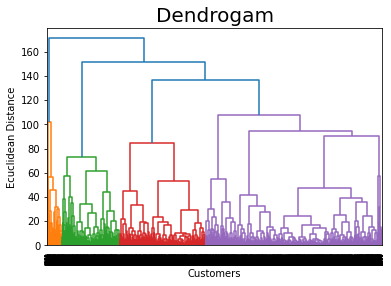

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


### KMEANS

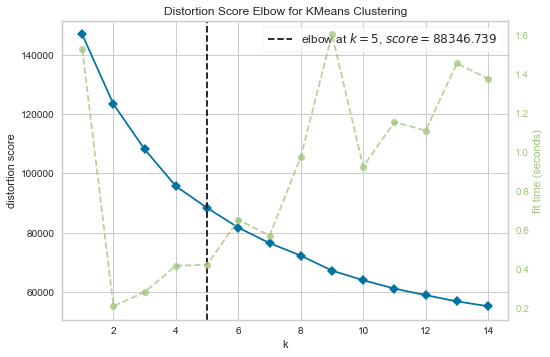

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(df_scaled)      
visualizer.show()

[0.28152011 0.20259326 0.11378109 0.11474499 0.09650746 0.08966139
 0.08645584 0.07634862 0.07835183]


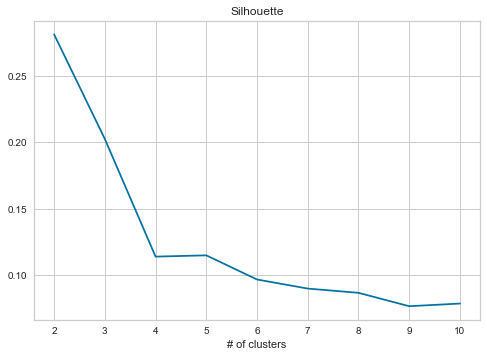

In [16]:
#librairie pour évaluation des partitions
from sklearn import cluster
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res=np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(df)
    res[k] = metrics.silhouette_score(df_scaled,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [17]:
model = KMeans(n_clusters=5,init='k-means++').fit(X_train)
ypred=model.labels_
# ou ypred= model.predict(kmeans)
silhouette_score(X_train,ypred)

0.1934820103932603

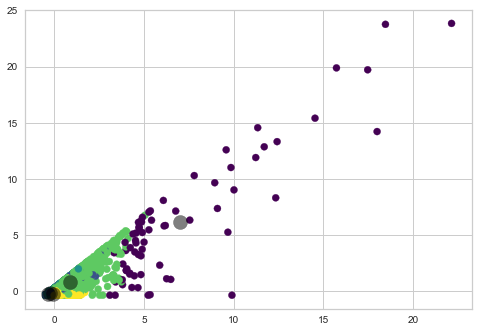

In [22]:
plt.scatter(X_train[:,2],X_train[:,3],c=ypred, s=50, cmap='viridis')
centers = model.cluster_centers_ 
plt.scatter(centers[:,2], centers[:,3], c='black', s=200, alpha=0.5)

###  GaussianMixture

In [9]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
#
# define the model
model = GaussianMixture(n_components=5,max_iter=100)
# fit the model
model.fit(df_scaled)
# assign a cluster to each example
yhat = model.predict(df_scaled)
# retrieve unique clusters
clusters = unique(yhat)
clusters

array([0, 1, 2, 3, 4], dtype=int64)

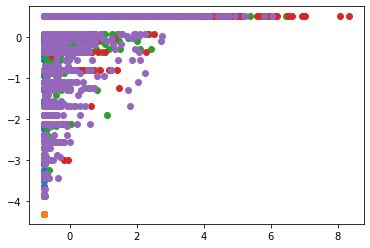

In [12]:
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(df_scaled[row_ix, 0], df_scaled[row_ix, 1])
# show the plot
pyplot.show()

# Conclusions

In [ ]:
# dendograme nécessite la création de clusters qui ont un ordre prédéterminé de haut en bas
#kmeans on peut avoir le nombre de cluster ideal à l'aide de graphe  de elbow et Silhouette